# üìä An√°lisis Exploratorio de Datos (EDA)

En este notebook exploraremos el conjunto de datos de eficiencia energ√©tica de la UCI Machine Learning Repository. El objetivo es comprender la estructura, distribuci√≥n y relaciones entre las variables, para luego preparar los datos que se utilizar√°n en modelos de regresi√≥n.

Se analizar√°n dos variables objetivo:
- `Heating Load`: demanda de calefacci√≥n
- `Cooling Load`: demanda de refrigeraci√≥n

Los pasos a seguir incluyen la carga, inspecci√≥n, visualizaci√≥n y limpieza b√°sica del dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

from ucimlrepo import fetch_ucirepo

# Agregar el directorio src al PATH
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from utils_EDA import analizar_columna_num, graficar_scatterplot

# Configuraci√≥n visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

## üîç Carga de datos

Usaremos la librer√≠a `ucimlrepo` para descargar directamente el conjunto de datos. Luego, combinaremos las caracter√≠sticas (`X`) y las variables objetivo (`y`) en un solo DataFrame para facilitar el an√°lisis.

In [3]:
# Cargar datos desde UCI
energy_efficiency = fetch_ucirepo(id=242)

# Separar en features y targets
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# Combinar
df = pd.concat([X, y], axis=1)
df.head()


X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

## ‚ÑπÔ∏è Informaci√≥n General

Vamos a explorar la estructura del DataFrame, sus dimensiones, tipos de variables y estad√≠sticas b√°sicas.

In [4]:
print(f"Dimensiones del dataset: {df.shape}")
df.info()
df.describe().T

Dimensiones del dataset: (768, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


count        mean        std     min       25%     50%       75%     max
X1  768.0    0.764167   0.105777    0.62    0.6825    0.75    0.8300    0.98
X2  768.0  671.708333  88.086116  514.50  606.3750  673.75  741.1250  808.50
X3  768.0  318.500000  43.626481  245.00  294.0000  318.50  343.0000  416.50
X4  768.0  176.604167  45.165950  110.25  140.8750  183.75  220.5000  220.50
X5  768.0    5.250000   1.751140    3.50    3.5000    5.25    7.0000    7.00
X6  768.0    3.500000   1.118763    2.00    2.7500    3.50    4.2500    5.00
X7  768.0    0.234375   0.133221    0.00    0.1000    0.25    0.4000    0.40
X8  768.0    2.812500   1.550960    0.00    1.7500    3.00    4.0000    5.00
Y1  768.0   22.307201  10.090196    6.01   12.9925   18.95   31.6675   43.10
Y2  768.0   24.587760   9.513306   10.90   15.6200   22.08   33.1325   48.03

## üîé Observaciones del Dataset

A partir de la inspecci√≥n general de los datos, se destacan los siguientes puntos:

- El conjunto de datos contiene **768 registros y 10 columnas**, sin presencia de valores nulos.
- Las variables de entrada est√°n codificadas como `X1` a `X8`, y las variables objetivo como `Y1` (Heating Load) y `Y2` (Cooling Load).
- Todas las variables tienen tipo de dato num√©rico (`float64` o `int64`), lo cual es adecuado para modelos de regresi√≥n sin necesidad de conversi√≥n adicional.
- Algunas observaciones espec√≠ficas:
  - `X1` a `X4` parecen ser variables continuas relacionadas con geometr√≠a y superficie de la edificaci√≥n (valores entre 0.6 y 800 aprox.).
  - `X6` y `X8` son variables enteras con valores discretos, lo que sugiere que podr√≠an ser **variables categ√≥ricas codificadas como n√∫meros** (como orientaci√≥n o tipo de acristalamiento).
  - `X7` tiene una media de 0.23 y un m√°ximo de 0.4, lo que sugiere que es una **proporci√≥n** o raz√≥n.
- Las variables objetivo (`Y1`, `Y2`):
  - `Y1` (Heating Load) tiene una media de 22.3 y un rango entre 6.01 y 43.1.
  - `Y2` (Cooling Load) tiene una media de 24.6 y un rango entre 10.9 y 48.0.
  - Ambas variables muestran **alta dispersi√≥n**, lo que puede implicar diferencias marcadas seg√∫n los valores de las features.

Estas observaciones ser√°n √∫tiles para entender el comportamiento del modelo y evaluar qu√© variables tienen mayor influencia sobre el consumo energ√©tico.

## üö´ Valores nulos y duplicados

Verificaremos si existen valores faltantes o filas duplicadas que puedan afectar el an√°lisis posterior.

In [5]:
print(df.isnull().sum())
print(f"Filas duplicadas: {df.duplicated().sum()}")

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64
Filas duplicadas: 0


## üìä Distribuci√≥n de las variables

Visualizamos la distribuci√≥n de todas las columnas para detectar posibles valores at√≠picos, sesgos o transformaciones necesarias.


## X1

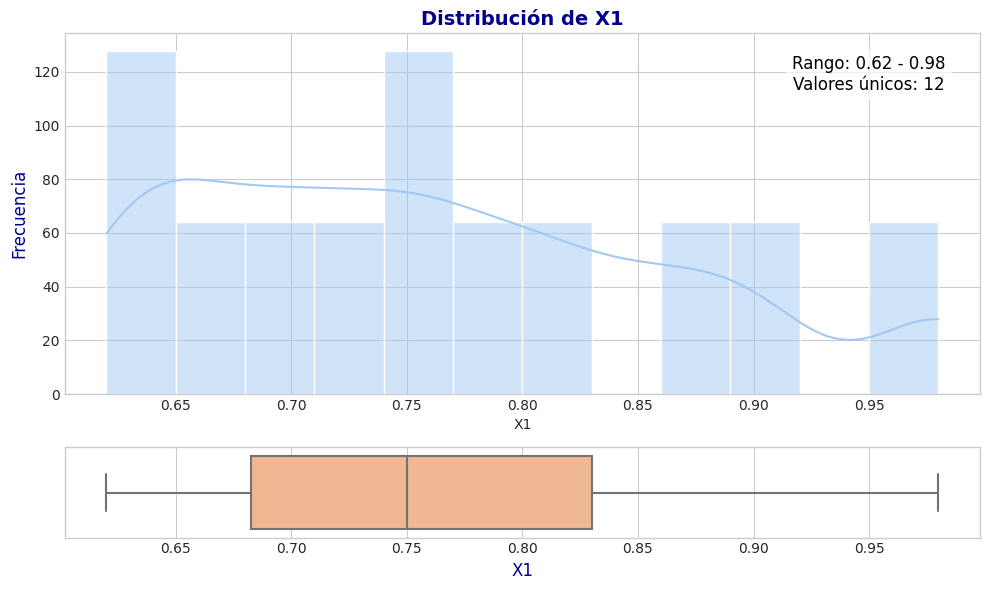

In [6]:
analizar_columna_num("X1", df)

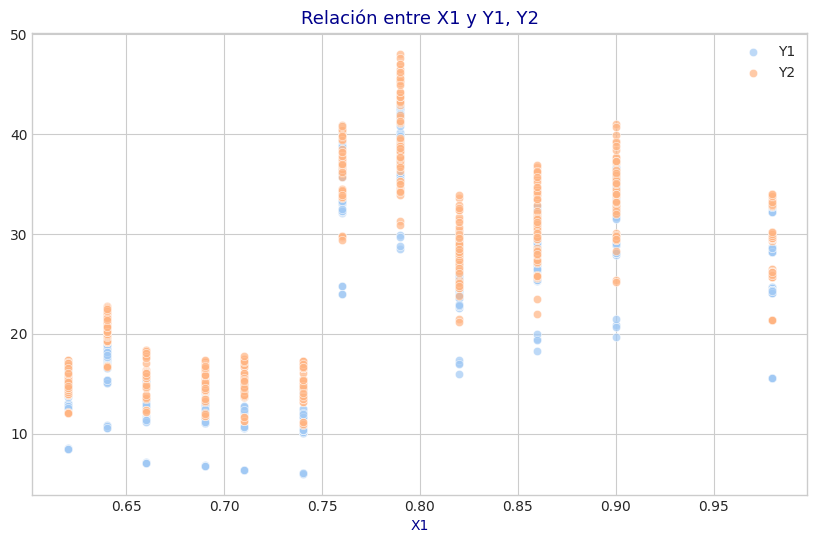

In [7]:
graficar_scatterplot(df, "X1", "Y1", "Y2")

> Al observar los gr√°ficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 12 valores √∫nicos y una distribuci√≥n bimodal, lo que sugiere que **no es necesario aplicar una transformaci√≥n num√©rica**. Dado el reducido n√∫mero de valores distintos y la forma de su distribuci√≥n, tambi√©n **podr√≠a considerarse la opci√≥n de tratar esta variable como categ√≥rica**, dependiendo del contexto del an√°lisis.

## X2

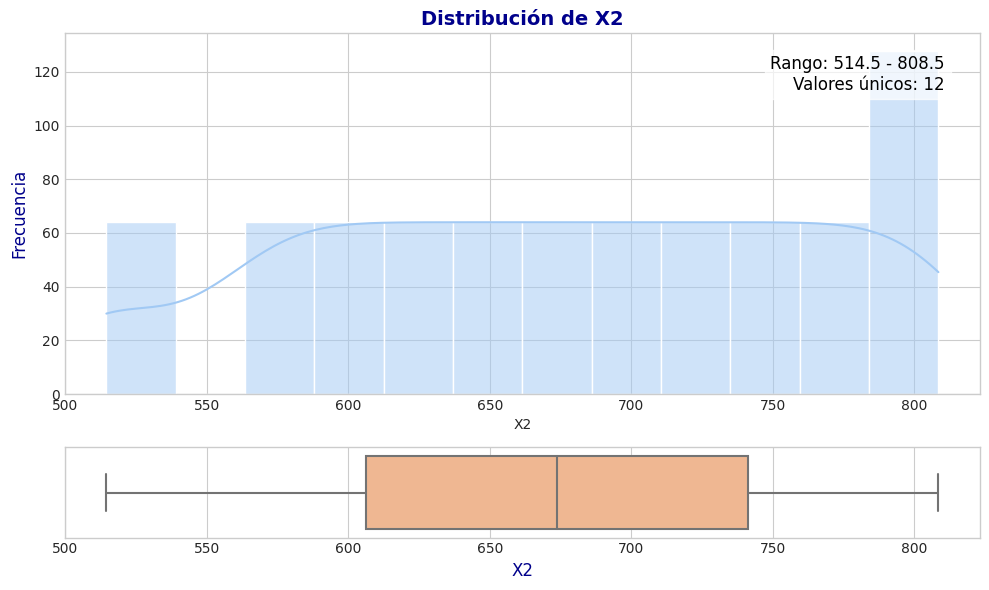

In [8]:
analizar_columna_num("X2", df)

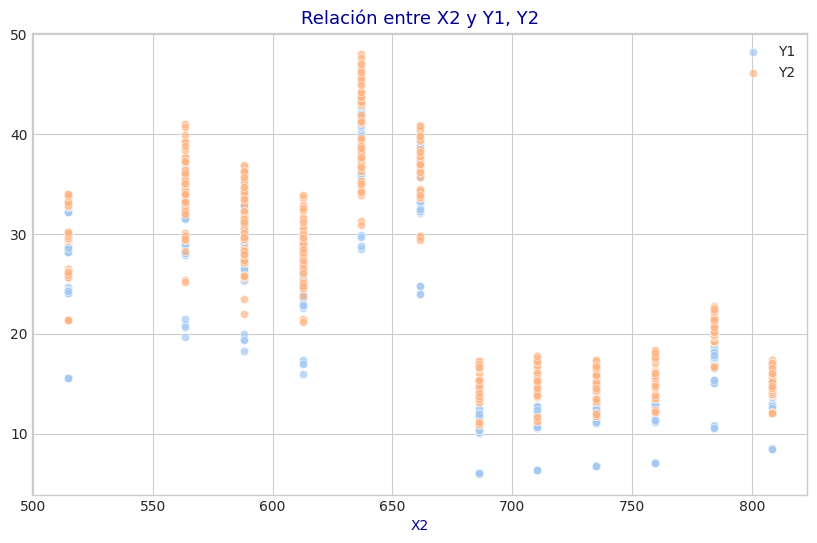

In [9]:
graficar_scatterplot(df, "X2", "Y1", "Y2")

> Al observar los gr√°ficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 12 valores √∫nicos, lo que sugiere que **no es necesario aplicar una transformaci√≥n num√©rica**. Dado el reducido n√∫mero de valores distintos y la forma de su distribuci√≥n, tambi√©n **podr√≠a considerarse la opci√≥n de tratar esta variable como categ√≥rica**, dependiendo del contexto del an√°lisis.

## X3

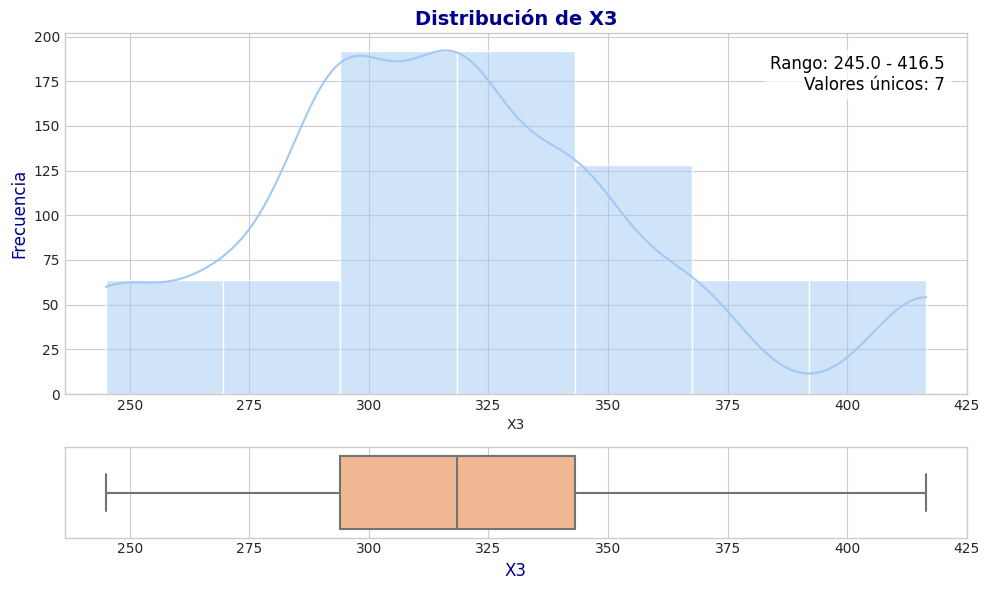

In [10]:
analizar_columna_num("X3", df)

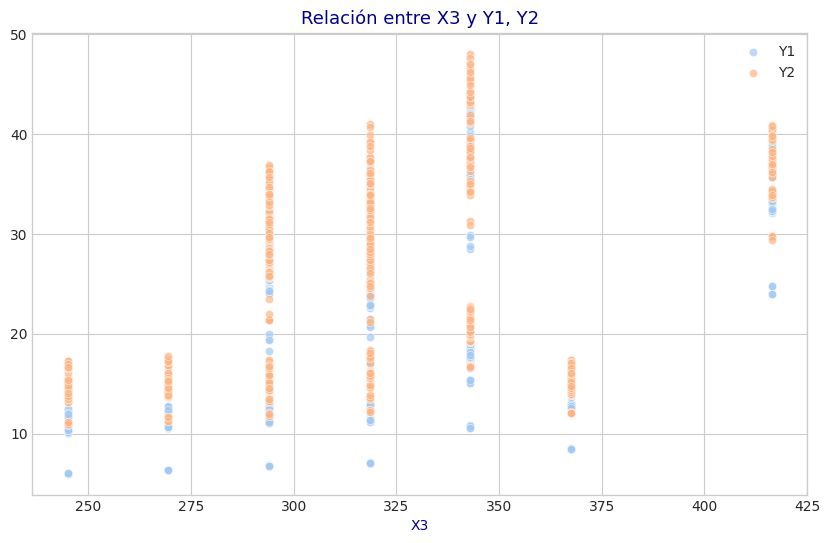

In [11]:
graficar_scatterplot(df, "X3", "Y1", "Y2")

> Al observar los gr√°ficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 7 valores √∫nicos y una distribuci√≥n bimodal, lo que sugiere que **no es necesario aplicar una transformaci√≥n num√©rica**. Dado el reducido n√∫mero de valores distintos y la forma de su distribuci√≥n, tambi√©n **podr√≠a considerarse la opci√≥n de tratar esta variable como categ√≥rica**, dependiendo del contexto del an√°lisis.

## X4

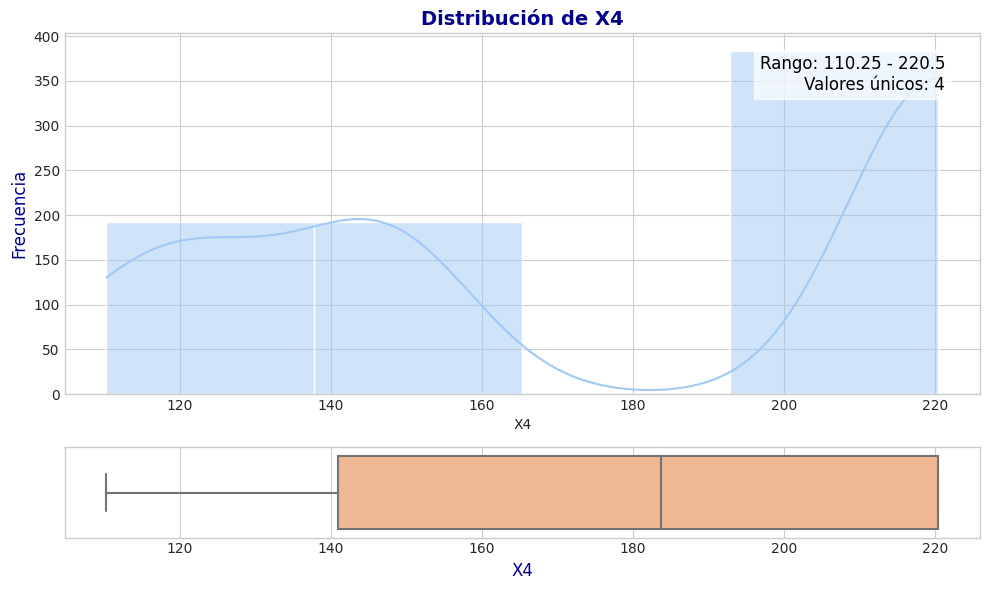

In [12]:
analizar_columna_num("X4", df)

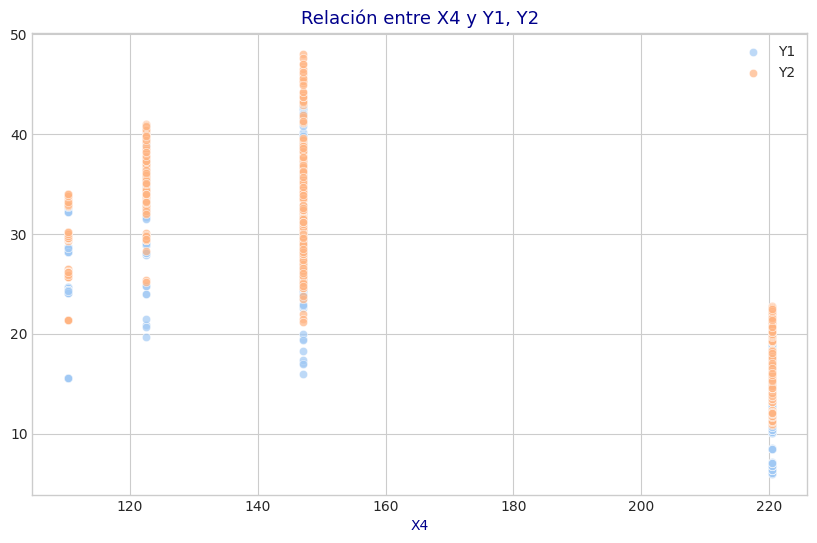

In [13]:
graficar_scatterplot(df, "X4", "Y1", "Y2")

> Al observar los gr√°ficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 4 valores √∫nicos, lo que sugiere que **no es necesario aplicar una transformaci√≥n num√©rica**. Dado el reducido n√∫mero de valores distintos y la forma de su distribuci√≥n, tambi√©n **podr√≠a considerarse la opci√≥n de tratar esta variable como categ√≥rica**, dependiendo del contexto del an√°lisis.

## X5

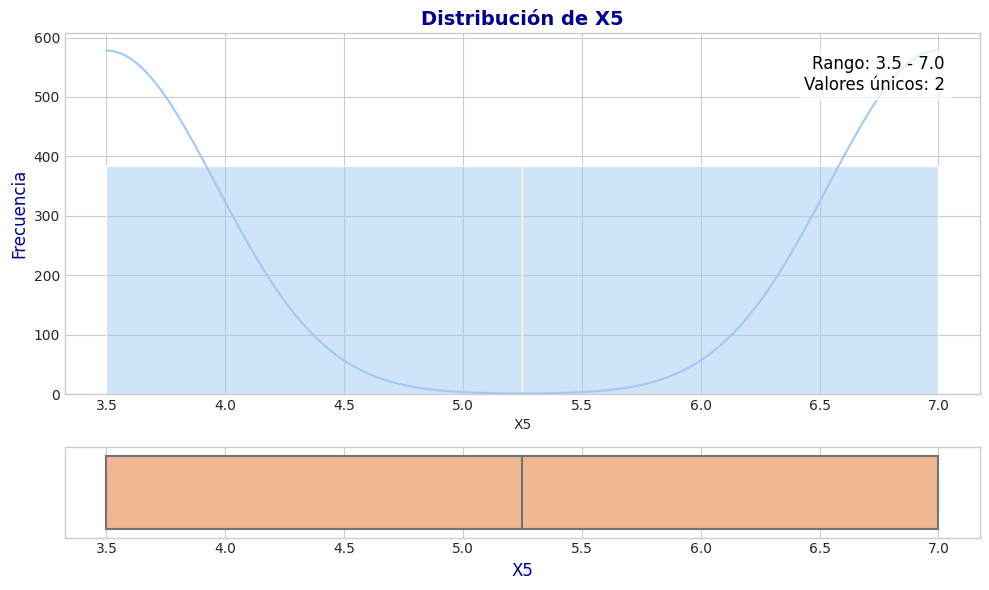

In [14]:
analizar_columna_num("X5", df)

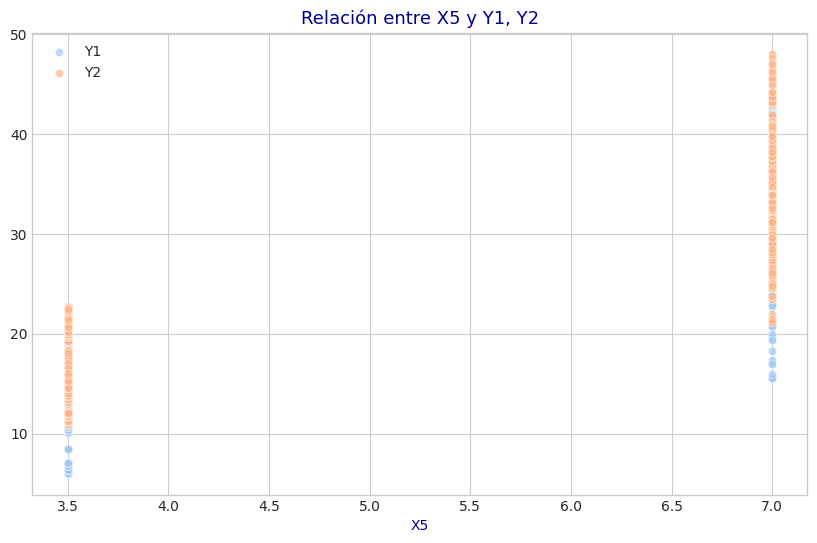

In [15]:
graficar_scatterplot(df, "X5", "Y1", "Y2")

> Al observar los gr√°ficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 2 valores √∫nicos, lo que sugiere que **no es necesario aplicar una transformaci√≥n num√©rica**. Dado el reducido n√∫mero de valores distintos y la forma de su distribuci√≥n, tambi√©n **podr√≠a considerarse la opci√≥n de tratar esta variable como categ√≥rica**, dependiendo del contexto del an√°lisis.

## X6

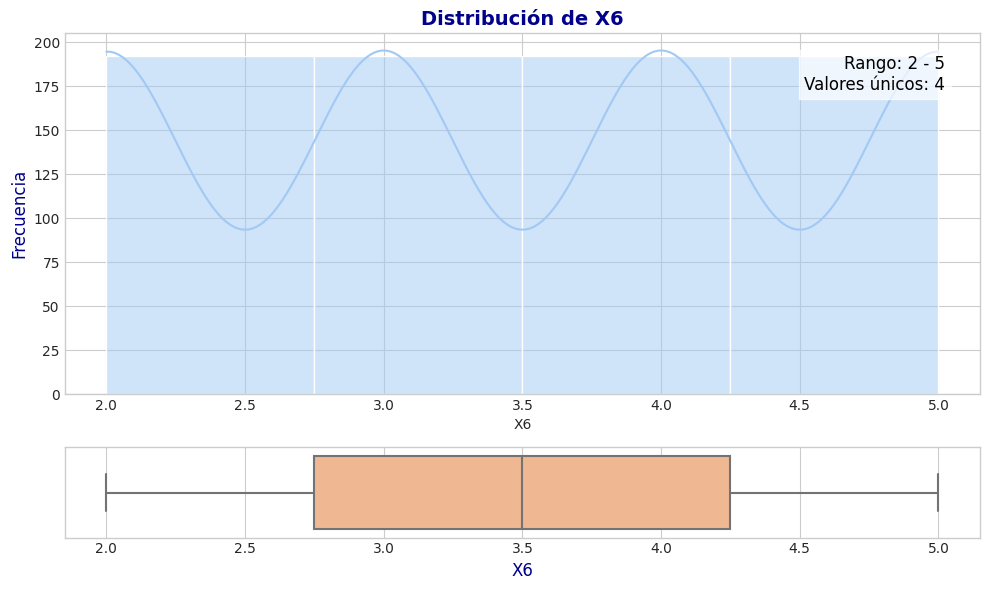

In [16]:
analizar_columna_num("X6", df)

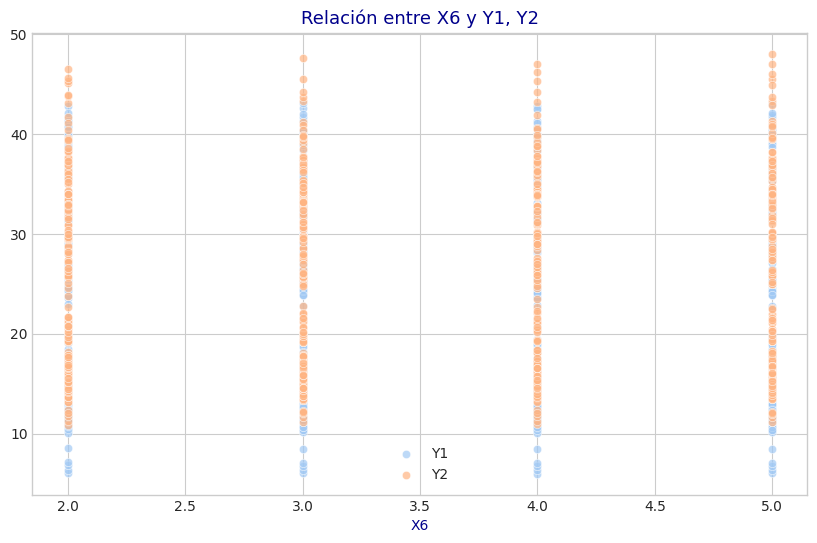

In [17]:
graficar_scatterplot(df, "X6", "Y1", "Y2")

> Al observar los gr√°ficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 4 valores √∫nicos, lo que sugiere que **no es necesario aplicar una transformaci√≥n num√©rica**. Dado el reducido n√∫mero de valores distintos y la forma de su distribuci√≥n, tambi√©n **podr√≠a considerarse la opci√≥n de tratar esta variable como categ√≥rica**, dependiendo del contexto del an√°lisis.

## X7

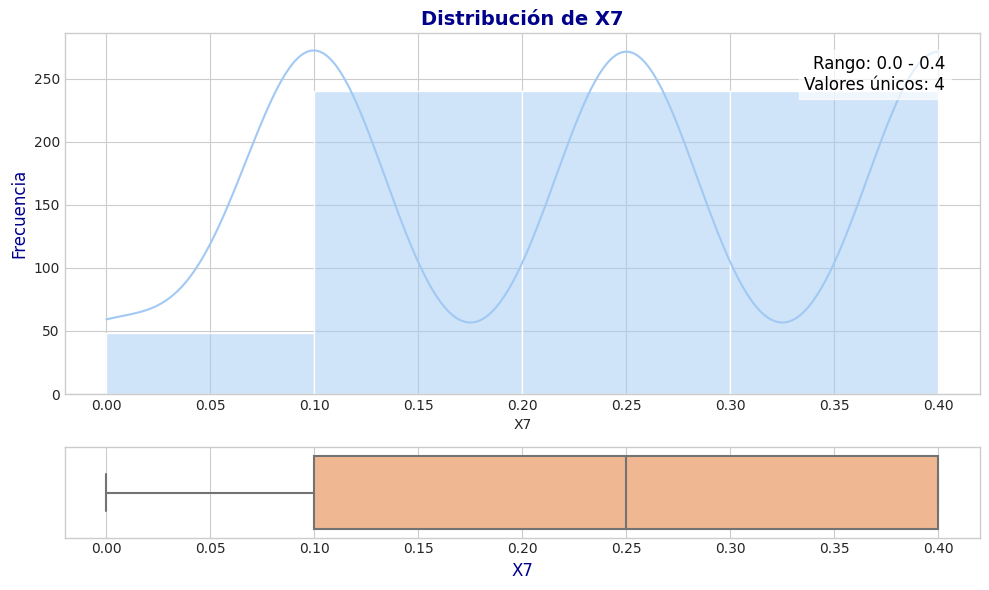

In [18]:
analizar_columna_num("X7", df)

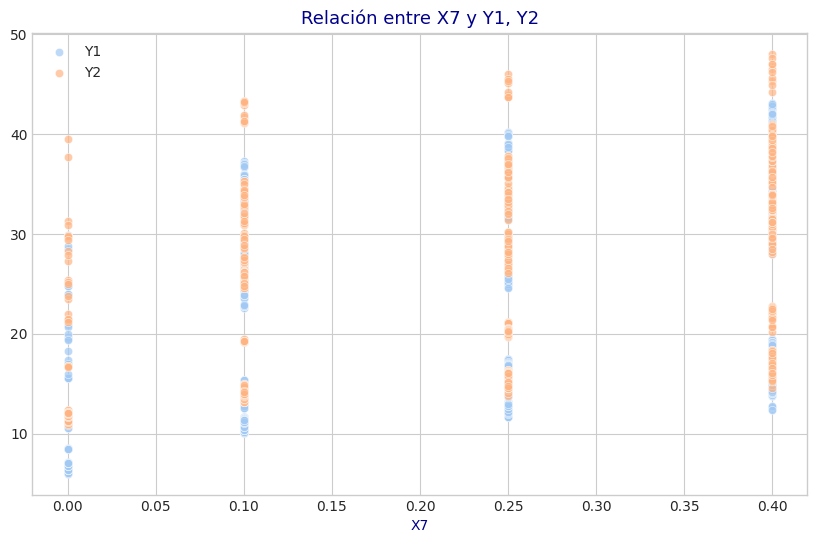

In [19]:
graficar_scatterplot(df, "X7", "Y1", "Y2")

> Al observar los gr√°ficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 4 valores √∫nicos, lo que sugiere que **no es necesario aplicar una transformaci√≥n num√©rica**. Dado el reducido n√∫mero de valores distintos y la forma de su distribuci√≥n, tambi√©n **podr√≠a considerarse la opci√≥n de tratar esta variable como categ√≥rica**, dependiendo del contexto del an√°lisis.

## X8

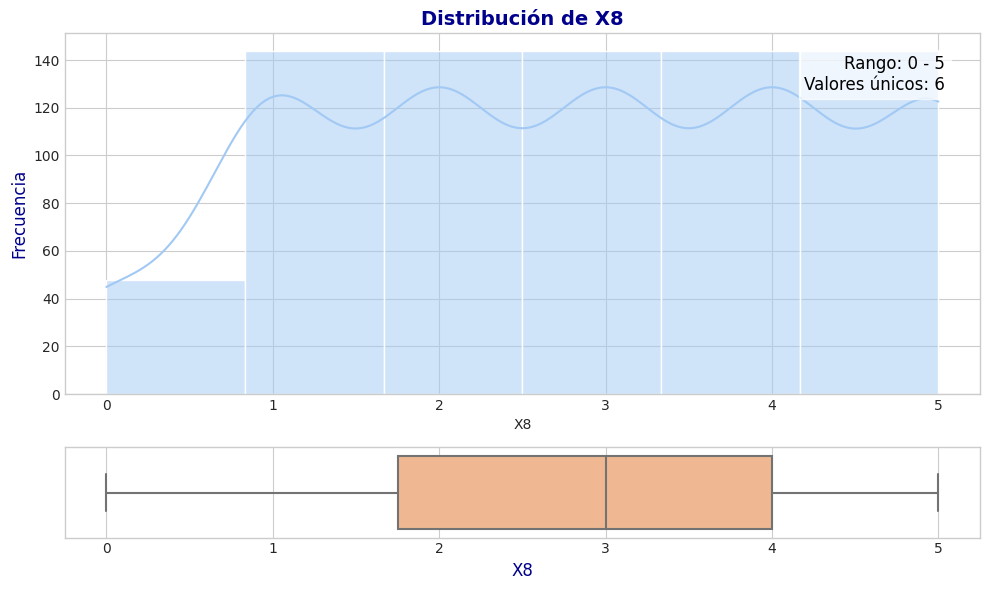

In [20]:
analizar_columna_num("X8", df)

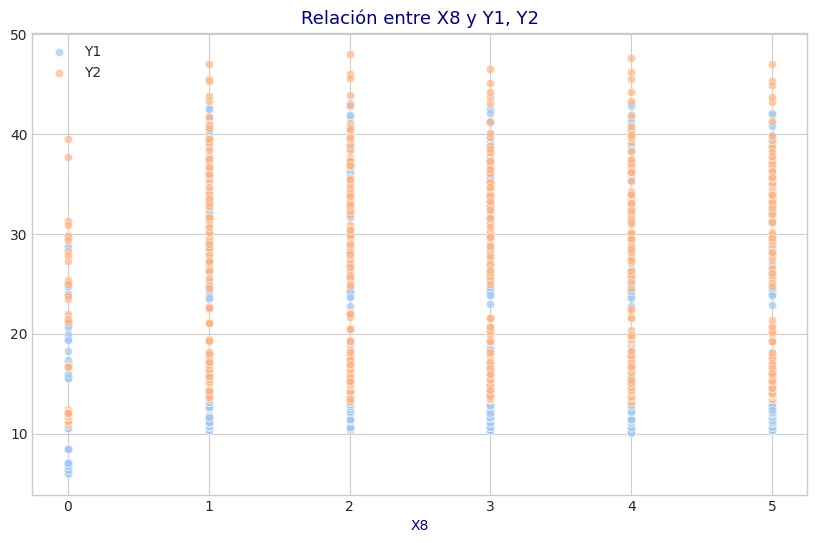

In [21]:
graficar_scatterplot(df, "X8", "Y1", "Y2")

> Al observar los gr√°ficos, no se evidencia la presencia de outliers en la variable analizada. Esta presenta 6 valores √∫nicos, lo que sugiere que **no es necesario aplicar una transformaci√≥n num√©rica**. Dado el reducido n√∫mero de valores distintos y la forma de su distribuci√≥n, tambi√©n **podr√≠a considerarse la opci√≥n de tratar esta variable como categ√≥rica**, dependiendo del contexto del an√°lisis.

## Y1

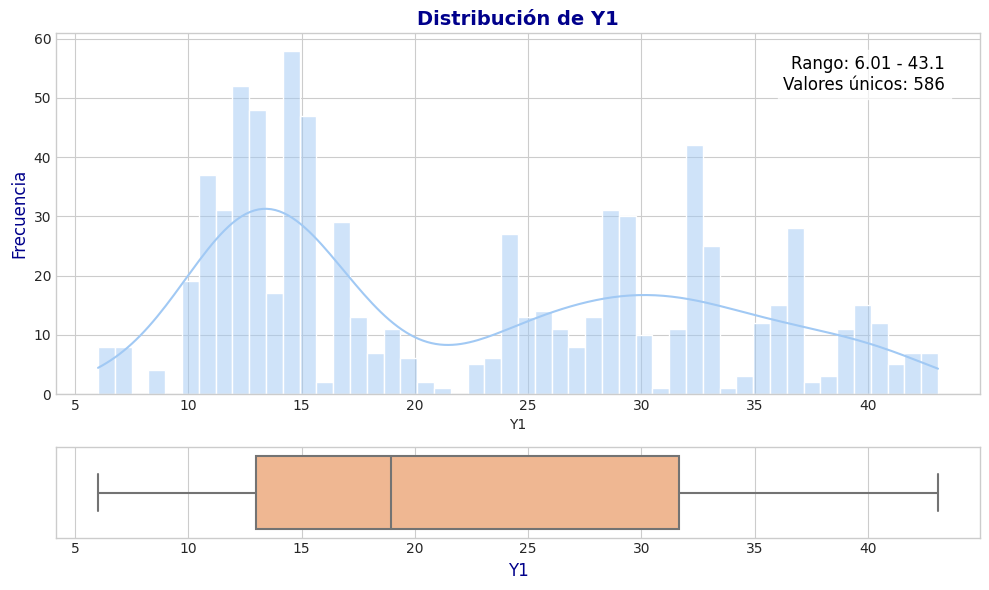

In [22]:
analizar_columna_num("Y1", df)

## Y2

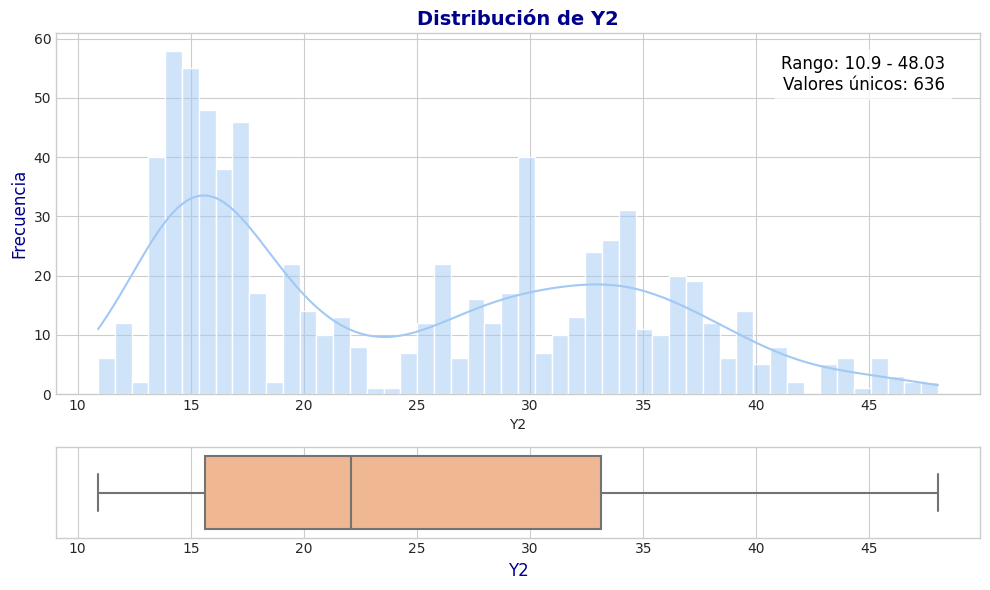

In [23]:
analizar_columna_num("Y2", df)

#### **Observaciones**
Al analizar las variables, se observa que:
* No presentan outliers y que no siguen una distribuci√≥n normal. 


En particular, debido a la naturaleza de una de las variables num√©ricas ‚Äîcaracterizada por un n√∫mero limitado de valores √∫nicos‚Äî **podr√≠a evaluarse su transformaci√≥n a variable categ√≥rica** para analizar su impacto en el modelo. 

En cuanto a las variables objetivo, estas tampoco siguen una distribuci√≥n normal y, en general, no presentan relaciones lineales evidentes con las dem√°s variables, con la excepci√≥n de **la variable X5, la cual s√≠ muestra una relaci√≥n lineal notable** y, adem√°s, no presenta valores at√≠picos.

## üîó Correlaci√≥n entre variables

Calculamos la matriz de correlaci√≥n para identificar relaciones fuertes entre variables predictoras y las variables objetivo.


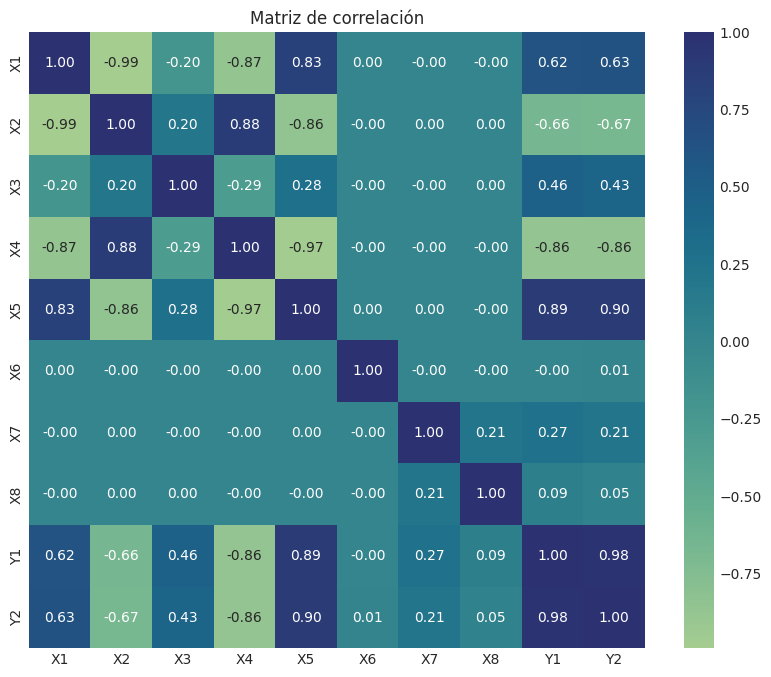

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="crest", square=True)
plt.title("Matriz de correlaci√≥n")
plt.show()

> Al analizar la matriz de correlaci√≥n, se observa que la variable **X5 presenta una fuerte correlaci√≥n positiva con las variables objetivo**, mientras que **X4 muestra una correlaci√≥n negativa tambi√©n significativa**, aunque de menor magnitud que X5. 

> Por otro lado, **las variables X6, X7 y X8 evidencian una correlaci√≥n d√©bil** con las variables objetivo. 

> Finalmente, las **dos variables objetivo presentan entre s√≠ una correlaci√≥n positiva considerablemente alta**.

## üìÇ Separaci√≥n de variables

Separamos el dataset en variables independientes `X` y las dos variables objetivo `y_heating` y `y_cooling`. Esto facilitar√° el entrenamiento y evaluaci√≥n de modelos.


In [25]:
X = df.drop(columns=["Y1", "Y2"])
y_heating = df["Y1"]
y_cooling = df["Y2"]

## üíæ Guardar archivos procesados

Exportamos las versiones limpias del dataset a la carpeta `data/` para su uso en futuros notebooks.


In [26]:
os.makedirs("../data", exist_ok=True)

X.to_csv("../data/features.csv", index=False)
y_heating.to_csv("../data/y_heating.csv", index=False)
y_cooling.to_csv("../data/y_cooling.csv", index=False)

## üìå Conclusiones del An√°lisis Exploratorio

El an√°lisis exploratorio del conjunto de datos de eficiencia energ√©tica permiti√≥ identificar aspectos clave que ser√°n relevantes para la etapa de modelado:

- **Ausencia de outliers:** Las variables no presentan valores at√≠picos evidentes, lo cual simplifica el preprocesamiento.
- **Distribuciones no normales:** Ni las variables predictoras ni las variables objetivo siguen una distribuci√≥n normal, lo que sugiere que podr√≠an requerirse transformaciones espec√≠ficas en caso de usar modelos sensibles a esta condici√≥n.
- **X5 como variable relevante:** Se identific√≥ una **fuerte relaci√≥n lineal y correlaci√≥n positiva** entre la variable `X5` y las dos variables objetivo (`Y1`, `Y2`), posicion√°ndola como una potencial variable clave para la predicci√≥n.
- **X4 con correlaci√≥n negativa:** La variable `X4` muestra una correlaci√≥n negativa significativa, aunque m√°s d√©bil que la de `X5`.
- **Variables con bajo aporte:** Las variables `X6`, `X7` y `X8` evidencian **baja correlaci√≥n** con las variables objetivo, por lo que podr√≠an tener un aporte limitado al modelo.
- **Relaci√≥n entre Y1 y Y2:** Las variables objetivo (`Y1` y `Y2`) presentan una **correlaci√≥n positiva alta**, lo que puede ser √∫til si se decide abordar un enfoque multisalida o si se analiza una en funci√≥n de la otra.
- **Posible categorizaci√≥n:** Se detect√≥ una variable con pocos valores √∫nicos que podr√≠a tratarse como **variable categ√≥rica** para evaluar su efecto con modelos que lo permitan.

Estas observaciones guiar√°n la selecci√≥n de variables, la ingenier√≠a de caracter√≠sticas y la elecci√≥n de los algoritmos de regresi√≥n en la siguiente etapa del proyecto.
